In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [64]:
def valid(submission, priority):
    coefficients_Dict = {"P1": 1, "P2": 1, "P3": 1, "ALL": 1}
    coefficients = coefficients_Dict[priority]
    priorityDays_dict = {"P1": 20, "P2": 60, "P3": 90}
    daysAllowedList = priorityDays_dict[priority]
    
    submission["prediction"] = pd.Series(submission["ClosedDay"] >= coefficients * daysAllowedList,
                                         index=submission.index)
    
    submission["truth"] = pd.Series(submission["Actual"] >= daysAllowedList, index=submission.index)
    # submission["issueType"] = test_df["issueType"]
    return submission

def evaluate_XGB(trainX, trainy, testX, testy, priority):

    pipeline = Pipeline([
        ('regressor', XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.05)),
    ])


    pipeline.fit(trainX, trainy)

    predictions = np.rint(pipeline.predict(testX)).astype(np.int64)


    submission = pd.DataFrame({'ClosedDay': predictions, 'Actual': testy['ResolvedDay'].tolist()})

    rmse = np.sqrt(mean_squared_error(predictions, testy))

    mae = mean_absolute_error(predictions, testy)

    valid(submission, priority)

    f1 = f1_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    precision = precision_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    recall = recall_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    
    print('OOSLA label:', precision, recall, f1)

    print(confusion_matrix(submission["truth"], submission["prediction"]))
    print(classification_report(submission["truth"], submission["prediction"]))
    return (f1, precision, recall)

def evaluate_RF(trainX, trainy, testX, testy, priority):

    pipeline = Pipeline([
        ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 0)),
    ])


    pipeline.fit(trainX, trainy)

    predictions = np.rint(pipeline.predict(testX)).astype(np.int64)


    submission = pd.DataFrame({'ClosedDay': predictions, 'Actual': testy['ResolvedDay'].tolist()})

    rmse = np.sqrt(mean_squared_error(predictions, testy))

    mae = mean_absolute_error(predictions, testy)

    valid(submission, priority)

    f1 = f1_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    precision = precision_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    recall = recall_score(submission["truth"], submission["prediction"], average='weighted', labels=[1])
    
    print('OOSLA label:', precision, recall, f1)


    print('rmse:', rmse)
    print('mae:', mae)
    print(confusion_matrix(submission["truth"], submission["prediction"]))
    print(classification_report(submission["truth"], submission["prediction"]))
    return (f1, precision, recall)

# P1 bug reports

In [65]:
print('########25% lifetime prediction point ########')
p1_25_train_url = "./data/p1_25_train.csv"
p1_25_test_url = "./data/p1_25_test.csv"
p1_train = pd.read_csv(p1_25_train_url)
p1_test = pd.read_csv(p1_25_test_url)

evolution_features = ["teamInvolvement", "evolution", 
                      "InitialActivityCount", "InitialActionCount", 
                      "recentActionCount", "recentActivityCount"]

p1_trainX = p1_train[evolution_features]
p1_testX = p1_test[evolution_features]

y_train = p1_train[["ResolvedDay"]]
y_test = p1_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_RF(p1_trainX, y_train, p1_testX, y_test, "P1")
print('-------------XGBoost Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_XGB(p1_trainX, y_train, p1_testX, y_test, "P1")

########25% lifetime prediction point ########
Train: 2106 Test: 523

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


OOSLA label: 0.789272030651341 0.8917748917748918 0.8373983739837398
rmse: 6.805407814805268
mae: 4.837476099426386
[[237  55]
 [ 25 206]]
              precision    recall  f1-score   support

       False       0.90      0.81      0.86       292
        True       0.79      0.89      0.84       231

    accuracy                           0.85       523
   macro avg       0.85      0.85      0.85       523
weighted avg       0.85      0.85      0.85       523

-------------XGBoost Result ------------
OOSLA label: 0.8137651821862348 0.8701298701298701 0.8410041841004184
[[246  46]
 [ 30 201]]
              precision    recall  f1-score   support

       False       0.89      0.84      0.87       292
        True       0.81      0.87      0.84       231

    accuracy                           0.85       523
   macro avg       0.85      0.86      0.85       523
weighted avg       0.86      0.85      0.86       523



In [4]:
print('########50% lifetime prediction point ########')
p1_50_train_url = "./data/p1_50_train.csv"
p1_50_test_url = "./data/p1_50_test.csv"
p1_train = pd.read_csv(p1_50_train_url)
p1_test = pd.read_csv(p1_50_test_url)

evolution_features = ["teamInvolvement", "evolution", 
                      "InitialActivityCount", "InitialActionCount", 
                      "recentActionCount", "recentActivityCount"]

p1_trainX = p1_train[evolution_features]
p1_testX = p1_test[evolution_features]

y_train = p1_train[["ResolvedDay"]]
y_test = p1_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_RF(p1_trainX, y_train, p1_testX, y_test, "P1")
print('-------------XGBoost Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_XGB(p1_trainX, y_train, p1_testX, y_test, "P1")

########50% lifetime prediction point ########
Train: 2094 Test: 535

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8434994522371224 0.8486229484642462 0.8429906542056075
rmse: 7.155939954716922
mae: 5.106542056074766
[[242  56]
 [ 28 209]]
              precision    recall  f1-score   support

       False       0.90      0.81      0.85       298
        True       0.79      0.88      0.83       237

    accuracy                           0.84       535
   macro avg       0.84      0.85      0.84       535
weighted avg       0.85      0.84      0.84       535

-------------XGBoost Result ------------
rmse: 7.246010826461431
mae: 5.338317757009346
[[249  49]
 [ 28 209]]
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       298
        True       0.81      0.88      0.84       237

    accuracy                           0.86       535
   macro avg       0.85      0.86      0.86       535
weighted avg       0.86      0.86      0.86       535



In [5]:
print('########75% lifetime prediction point ########')
p1_75_train_url = "./data/p1_75_train.csv"
p1_75_test_url = "./data/p1_75_test.csv"
p1_train = pd.read_csv(p1_75_train_url)
p1_test = pd.read_csv(p1_75_test_url)


p1_trainX = p1_train[evolution_features]
p1_testX = p1_test[evolution_features]

y_train = p1_train[["ResolvedDay"]]
y_test = p1_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_RF(p1_trainX, y_train, p1_testX, y_test, "P1")
print('-------------XGBoost Result ------------')
p1_f1, p1_precision, p1_recall = evaluate_XGB(p1_trainX, y_train, p1_testX, y_test, "P1")


########75% lifetime prediction point ########
Train: 2143 Test: 486

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8507346675212382 0.8548598878494729 0.8497942386831275
rmse: 7.099527602669769
mae: 4.97119341563786
[[241  47]
 [ 26 172]]
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       288
        True       0.79      0.87      0.82       198

    accuracy                           0.85       486
   macro avg       0.84      0.85      0.85       486
weighted avg       0.85      0.85      0.85       486

-------------XGBoost Result ------------
rmse: 6.810183611551547
mae: 4.851851851851852
[[248  40]
 [ 27 171]]
              precision    recall  f1-score   support

       False       0.90      0.86      0.88       288
        True       0.81      0.86      0.84       198

    accuracy                           0.86       486
   macro avg       0.86      0.86      0.86       486
weighted avg       0.86      0.86      0.86       486



# P2 bug reports

In [6]:
print('########25% lifetime prediction point ########')

p2_25_train_url = "./data/p2_25_train.csv"
p2_25_test_url = "./data/p2_25_test.csv"
p2_train = pd.read_csv(p2_25_train_url)
p2_test = pd.read_csv(p2_25_test_url)

evolution_features = ["projectCoverage", "activitysequence", 
                      "InitialActivityCount", "InitialActionCount", 
                      "recentActionCount", "recentActivityCount"]

p2_trainX = p2_train[evolution_features]
p2_testX = p2_test[evolution_features]

y_train = p2_train[["ResolvedDay"]]
y_test = p2_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_RF(p2_trainX, y_train, p2_testX, y_test, "P2")
print('-------------XGBoost Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_XGB(p2_trainX, y_train, p2_testX, y_test, "P2")

########25% lifetime prediction point ########
Train: 3181 Test: 799

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8597599620121419 0.8613205797953242 0.8585732165206508
rmse: 15.899520226386914
mae: 10.474342928660827
[[532  62]
 [ 51 154]]
              precision    recall  f1-score   support

       False       0.91      0.90      0.90       594
        True       0.71      0.75      0.73       205

    accuracy                           0.86       799
   macro avg       0.81      0.82      0.82       799
weighted avg       0.86      0.86      0.86       799

-------------XGBoost Result ------------
rmse: 15.415074786173733
mae: 10.175219023779725
[[547  47]
 [ 52 153]]
              precision    recall  f1-score   support

       False       0.91      0.92      0.92       594
        True       0.77      0.75      0.76       205

    accuracy                           0.88       799
   macro avg       0.84      0.83      0.84       799
weighted avg       0.88      0.88      0.88       799



In [7]:
print('########50% lifetime prediction point ########')
p2_50_train_url = "./data/p2_50_train.csv"
p2_50_test_url = "./data/p2_50_test.csv"
p2_train = pd.read_csv(p2_50_train_url)
p2_test = pd.read_csv(p2_50_test_url)

evolution_features = ["projectCoverage", "activitysequence", 
                      "InitialActivityCount", "InitialActionCount", 
                      "recentActionCount", "recentActivityCount"]

p2_trainX = p2_train[evolution_features]
p2_testX = p2_test[evolution_features]

y_train = p2_train[["ResolvedDay"]]
y_test = p2_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_RF(p2_trainX, y_train, p2_testX, y_test, "P2")
print('-------------XGBoost Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_XGB(p2_trainX, y_train, p2_testX, y_test, "P2")

########50% lifetime prediction point ########
Train: 3222 Test: 758

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.873539374500279 0.8760301705716469 0.8720316622691293
rmse: 15.192172682600141
mae: 10.102902374670185
[[493  57]
 [ 40 168]]
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       550
        True       0.75      0.81      0.78       208

    accuracy                           0.87       758
   macro avg       0.84      0.85      0.84       758
weighted avg       0.88      0.87      0.87       758

-------------XGBoost Result ------------
rmse: 15.047418453369932
mae: 10.29287598944591
[[499  51]
 [ 46 162]]
              precision    recall  f1-score   support

       False       0.92      0.91      0.91       550
        True       0.76      0.78      0.77       208

    accuracy                           0.87       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.87      0.87      0.87       758



In [8]:
print('########75% lifetime prediction point ########')
p2_75_train_url = "./data/p2_75_train.csv"
p2_75_test_url = "./data/p2_75_test.csv"
p2_train = pd.read_csv(p2_75_train_url)
p2_test = pd.read_csv(p2_75_test_url)

evolution_features = ["projectCoverage", "activitysequence", 
                      "InitialActivityCount", "InitialActionCount", 
                      "recentActionCount", "recentActivityCount"]

p2_trainX = p2_train[evolution_features]
p2_testX = p2_test[evolution_features]

y_train = p2_train[["ResolvedDay"]]
y_test = p2_test[["ResolvedDay"]]

print("Train:", len(p2_trainX), "Test:", len(p2_testX))

print()
print('-------------RF Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_RF(p2_trainX, y_train, p2_testX, y_test, "P2")
print('-------------XGBoost Result ------------')
p2_f1, p2_precision, p2_recall = evaluate_XGB(p2_trainX, y_train, p2_testX, y_test, "P2")



########75% lifetime prediction point ########
Train: 3161 Test: 819

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8713699134448977 0.8751759801153774 0.8693528693528694
rmse: 16.035826799630293
mae: 10.515262515262515
[[527  66]
 [ 41 185]]
              precision    recall  f1-score   support

       False       0.93      0.89      0.91       593
        True       0.74      0.82      0.78       226

    accuracy                           0.87       819
   macro avg       0.83      0.85      0.84       819
weighted avg       0.88      0.87      0.87       819

-------------XGBoost Result ------------
rmse: 16.109742689559308
mae: 10.44932844932845
[[542  51]
 [ 49 177]]
              precision    recall  f1-score   support

       False       0.92      0.91      0.92       593
        True       0.78      0.78      0.78       226

    accuracy                           0.88       819
   macro avg       0.85      0.85      0.85       819
weighted avg       0.88      0.88      0.88       819



# P4

In [9]:
print('########25% lifetime prediction point ########')
p3_25_train_url = "./data/p3_25_train.csv"
p3_25_test_url = "./data/p3_25_test.csv"

p3_train = pd.read_csv(p3_25_train_url)
p3_test = pd.read_csv(p3_25_test_url)

p3_trainX = p3_train[evolution_features]
p3_testX = p3_test[evolution_features]

p3_y_train = p3_train[["ResolvedDay"]]
p3_y_test = p3_test[["ResolvedDay"]]

print("Train:", len(p3_trainX), "Test:", len(p3_testX))

print()
print('-------------RF Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_RF(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")
print('-------------XGBoost Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_XGB(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")

########25% lifetime prediction point ########
Train: 1330 Test: 342

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8630401712341856 0.8636503539550631 0.8625730994152047
rmse: 21.10319950243958
mae: 14.818713450292398
[[206  25]
 [ 22  89]]
              precision    recall  f1-score   support

       False       0.90      0.89      0.90       231
        True       0.78      0.80      0.79       111

    accuracy                           0.86       342
   macro avg       0.84      0.85      0.84       342
weighted avg       0.86      0.86      0.86       342

-------------XGBoost Result ------------
rmse: 20.367744824593764
mae: 14.102339181286549
[[207  24]
 [ 19  92]]
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       231
        True       0.79      0.83      0.81       111

    accuracy                           0.87       342
   macro avg       0.85      0.86      0.86       342
weighted avg       0.88      0.87      0.87       342



In [10]:
print('########50% lifetime prediction point ########')
p3_50_train_url = "./data/p3_50_train.csv"
p3_50_test_url = "./data/p3_50_test.csv"

p3_train = pd.read_csv(p3_50_train_url)
p3_test = pd.read_csv(p3_50_test_url)

p3_trainX = p3_train[evolution_features]
p3_testX = p3_test[evolution_features]

p3_y_train = p3_train[["ResolvedDay"]]
p3_y_test = p3_test[["ResolvedDay"]]

print("Train:", len(p3_trainX), "Test:", len(p3_testX))

print()
print('-------------RF Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_RF(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")
print('-------------XGBoost Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_XGB(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")

########50% lifetime prediction point ########
Train: 1328 Test: 344

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8411303407247162 0.8425274660739777 0.8401162790697675
rmse: 22.55123365882416
mae: 15.709302325581396
[[209  30]
 [ 25  80]]
              precision    recall  f1-score   support

       False       0.89      0.87      0.88       239
        True       0.73      0.76      0.74       105

    accuracy                           0.84       344
   macro avg       0.81      0.82      0.81       344
weighted avg       0.84      0.84      0.84       344

-------------XGBoost Result ------------
rmse: 22.13581229696601
mae: 15.017441860465116
[[220  19]
 [ 25  80]]
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       239
        True       0.81      0.76      0.78       105

    accuracy                           0.87       344
   macro avg       0.85      0.84      0.85       344
weighted avg       0.87      0.87      0.87       344



In [11]:
print('########75% lifetime prediction point ########')
p3_75_train_url = "./data/p3_75_train.csv"
p3_75_test_url = "./data/p3_75_test.csv"

p3_train = pd.read_csv(p3_75_train_url)
p3_test = pd.read_csv(p3_75_test_url)

p3_trainX = p3_train[evolution_features]
p3_testX = p3_test[evolution_features]

p3_y_train = p3_train[["ResolvedDay"]]
p3_y_test = p3_test[["ResolvedDay"]]

print("Train:", len(p3_trainX), "Test:", len(p3_testX))

print()
print('-------------RF Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_RF(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")
print('-------------XGBoost Result ------------')
p3_f1, p3_precision, p3_recall = evaluate_XGB(p3_trainX, p3_y_train, p3_testX, p3_y_test, "P3")

########75% lifetime prediction point ########
Train: 1363 Test: 309

-------------RF Result ------------


/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8623493153908633 0.8648264316210098 0.86084142394822
rmse: 20.022236829024386
mae: 13.970873786407767
[[195  25]
 [ 18  71]]
              precision    recall  f1-score   support

       False       0.92      0.89      0.90       220
        True       0.74      0.80      0.77        89

    accuracy                           0.86       309
   macro avg       0.83      0.84      0.83       309
weighted avg       0.86      0.86      0.86       309

-------------XGBoost Result ------------
rmse: 19.009621137541913
mae: 13.320388349514563
[[201  19]
 [ 20  69]]
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       220
        True       0.78      0.78      0.78        89

    accuracy                           0.87       309
   macro avg       0.85      0.84      0.85       309
weighted avg       0.87      0.87      0.87       309



### Ablation Analysis

In [12]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
   
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
#     ax.spines[:].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [66]:
# Build ablation study map
F1_Map = [] 
Pre_Map = [] 
Rec_Map = [] 

train_data_urls = [p2_25_train_url, p2_50_train_url, p2_75_train_url, 
                   p3_25_train_url, p3_50_train_url, p3_75_train_url,
                   p4_25_train_url, p4_50_train_url, p4_75_train_url]

test_date_urls = [p2_25_test_url, p2_50_test_url, p2_75_test_url, 
                   p3_25_test_url, p3_50_test_url, p3_75_test_url,
                   p4_25_test_url, p4_50_test_url, p4_75_test_url]
Priority_list = ["P2", "P2", "P2", "P3", "P3", "P3", "P4", "P4", "P4"]

for feature in evolution_features:
    f1_temp = []
    precision_temp = [] 
    recall_temp = []
    for i in range(len(train_data_urls)):
        train_data = pd.read_csv(train_data_urls[i])
        test_data = pd.read_csv(test_date_urls[i])
        # Extract all evolution features
        trainX = train_data[evolution_features]
        testX = test_data[evolution_features]
        # Drop a feature
        trainX = trainX.drop(columns=[feature])
        testX = testX.drop(columns=[feature])
        # Extract y data
        y_train = train_data[["ResolvedDay"]]
        y_test = test_data[["ResolvedDay"]]
        
        f1, precision, recall = evaluate_XGB(trainX, y_train, testX, y_test, Priority_list[i])
        
        f1_temp.append(f1)
        precision_temp.append(precision)
        recall_temp.append(recall)
    
    F1_Map.append(f1_temp)
    Pre_Map.append(precision_temp)
    Rec_Map.append(recall_temp) 
    
    


OOSLA label: 0.8237704918032787 0.8701298701298701 0.8463157894736841
[[249  43]
 [ 30 201]]
              precision    recall  f1-score   support

       False       0.89      0.85      0.87       292
        True       0.82      0.87      0.85       231

    accuracy                           0.86       523
   macro avg       0.86      0.86      0.86       523
weighted avg       0.86      0.86      0.86       523

OOSLA label: 0.8305785123966942 0.8481012658227848 0.8392484342379958
[[257  41]
 [ 36 201]]
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       298
        True       0.83      0.85      0.84       237

    accuracy                           0.86       535
   macro avg       0.85      0.86      0.85       535
weighted avg       0.86      0.86      0.86       535

OOSLA label: 0.835820895522388 0.8484848484848485 0.8421052631578948
[[255  33]
 [ 30 168]]
              precision    recall  f1-score   support

       False 

OOSLA label: 0.7603686635944701 0.8048780487804879 0.7819905213270144
[[542  52]
 [ 40 165]]
              precision    recall  f1-score   support

       False       0.93      0.91      0.92       594
        True       0.76      0.80      0.78       205

    accuracy                           0.88       799
   macro avg       0.85      0.86      0.85       799
weighted avg       0.89      0.88      0.89       799

OOSLA label: 0.75 0.7932692307692307 0.7710280373831775
[[495  55]
 [ 43 165]]
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       550
        True       0.75      0.79      0.77       208

    accuracy                           0.87       758
   macro avg       0.84      0.85      0.84       758
weighted avg       0.87      0.87      0.87       758

OOSLA label: 0.7470355731225298 0.8362831858407079 0.7891440501043842
[[529  64]
 [ 37 189]]
              precision    recall  f1-score   support

       False       0.93   

OOSLA label: 0.7850877192982456 0.7920353982300885 0.7885462555066078
[[544  49]
 [ 47 179]]
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       593
        True       0.79      0.79      0.79       226

    accuracy                           0.88       819
   macro avg       0.85      0.85      0.85       819
weighted avg       0.88      0.88      0.88       819

OOSLA label: 0.8095238095238095 0.7657657657657657 0.787037037037037
[[211  20]
 [ 26  85]]
              precision    recall  f1-score   support

       False       0.89      0.91      0.90       231
        True       0.81      0.77      0.79       111

    accuracy                           0.87       342
   macro avg       0.85      0.84      0.84       342
weighted avg       0.86      0.87      0.86       342

OOSLA label: 0.8021978021978023 0.6952380952380952 0.7448979591836735
[[221  18]
 [ 32  73]]
              precision    recall  f1-score   support

       False 

In [181]:
F1_Map[0][0]=0.81

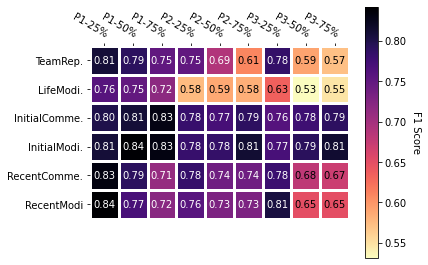

In [182]:
features = ["TeamRep.", "LifeModi.", "InitialComme.", "InitialModi.", "RecentComme.",
              "RecentModi"]
model_results = ["P1-25%", "P1-50%", "P1-75%",
           "P2-25%", "P2-50%", "P2-75%", "P3-25%", "P3-50%", "P3-75%"]

f1_scores = np.array(F1_Map)

fig, ax = plt.subplots()

# plt.figure(figsize=(3, 3))

im, cbar = heatmap(f1_scores, features, model_results, ax=ax, cmap="magma_r", cbarlabel="F1 Score")

texts = annotate_heatmap(im, valfmt="{x:.2f}")
 
fig.tight_layout()


plt.show()

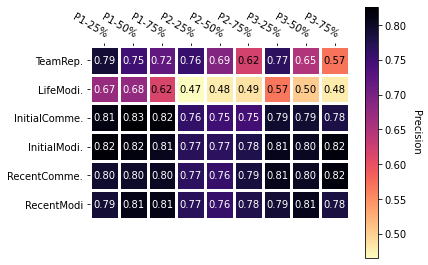

In [133]:
precision_map = np.array(Pre_Map)

fig, ax = plt.subplots()

im, cbar = heatmap(precision_map, features, model_results, ax=ax, cmap="magma_r", cbarlabel="Precision")

texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

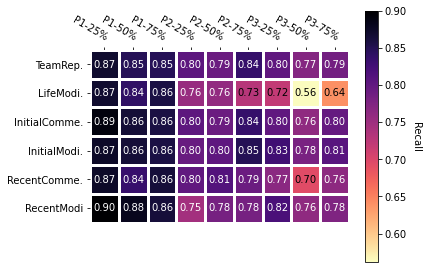

In [118]:
recall_map = np.array(Rec_Map)

fig, ax = plt.subplots()

im, cbar = heatmap(recall_map, vegetables, model_results, ax=ax, cmap="magma_r", cbarlabel="Recall")

texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()